# Text Analysis on Great Expectations Novel

### Imports- **Run First**

In [1]:
#Bring in text file with our novel
textfile = open('great_expectations.txt', 'r', encoding = "utf8")
great_expect = textfile.read()



In [2]:
#Import libraries
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

import pandas as pd
from PIL import Image
import numpy as np
import random
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Data cleaning to split data into sentences
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|edu|me)"
digits = "([0-9])"

text = " " + great_expect + "  "
text = text.replace("\n"," ")
text = re.sub(prefixes,"\\1<prd>",text)
text = re.sub(websites,"<prd>\\1",text)
text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
if "..." in text: text = text.replace("...","<prd><prd><prd>")
if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
if "”" in text: text = text.replace(".”","”.")
if "\"" in text: text = text.replace(".\"","\".")
if "!" in text: text = text.replace("!\"","\"!")
if "?" in text: text = text.replace("?\"","\"?")
text = text.replace(".",".<stop>")
text = text.replace("?","?<stop>")
text = text.replace("!","!<stop>")
text = text.replace("<prd>",".")
sentences = text.split("<stop>")
sentences = [s.strip() for s in sentences]
sentences = pd.DataFrame(sentences)
sentences.columns = ['sentence']

In [4]:
#Remove the first few rows of text that are irrelevant for analysis
sentences.drop(sentences.index[:59], inplace=True)
sentences = sentences.reset_index(drop=True)
sentences.head(10)

,sentence
0,[Illustration] Chapter I. My father’s fa...
1,"So, I called myself Pip, and came to be called..."
2,"I give Pirrip as my father’s family name, on t..."
3,"As I never saw my father or my mother, and nev..."
4,"The shape of the letters on my father’s, gave ..."
5,From the character and turn of the inscription...
6,"To five little stone lozenges, each about a fo..."
7,"Ours was the marsh country, down by the river,..."
8,My first most vivid and broad impression of th...
9,At such a time I found out for certain that th...


### How to perform Vader sentiment analysis

In [5]:
#Initialize Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [6]:
#Perfom Vader sentiment analysis
sentences['compound'] = [analyzer.polarity_scores(x)['compound'] for x in sentences['sentence']]
sentences['neg'] = [analyzer.polarity_scores(x)['neg'] for x in sentences['sentence']]
sentences['neu'] = [analyzer.polarity_scores(x)['neu'] for x in sentences['sentence']]
sentences['pos'] = [analyzer.polarity_scores(x)['pos'] for x in sentences['sentence']]
sentences.head(10)

,sentence,compound,neg,neu,pos
0,[Illustration] Chapter I. My father’s fa...,0.0000,0.000,1.000,0.000
1,"So, I called myself Pip, and came to be called...",0.0000,0.000,1.000,0.000
2,"I give Pirrip as my father’s family name, on t...",0.0772,0.000,0.942,0.058
3,"As I never saw my father or my mother, and nev...",0.3612,0.000,0.941,0.059
4,"The shape of the letters on my father’s, gave ...",-0.1531,0.088,0.846,0.065
5,From the character and turn of the inscription...,-0.2960,0.087,0.913,0.000
6,"To five little stone lozenges, each about a fo...",0.4404,0.047,0.883,0.070
7,"Ours was the marsh country, down by the river,...",0.0000,0.000,1.000,0.000
8,My first most vivid and broad impression of th...,0.5423,0.000,0.836,0.164
9,At such a time I found out for certain that th...,-0.9325,0.124,0.848,0.028


In [7]:
#Get number of positive, neutral, and negative sentences
positive_sentence = sentences.loc[sentences['compound'] > 0]
negative_sentence = sentences.loc[sentences['compound'] < 0]
neutral_sentence = sentences.loc[sentences['compound'] == 0]

print(sentences.shape)
print(len(positive_sentence))
print(len(negative_sentence))
print(len(neutral_sentence))

(9979, 5)
3232
2452
4295


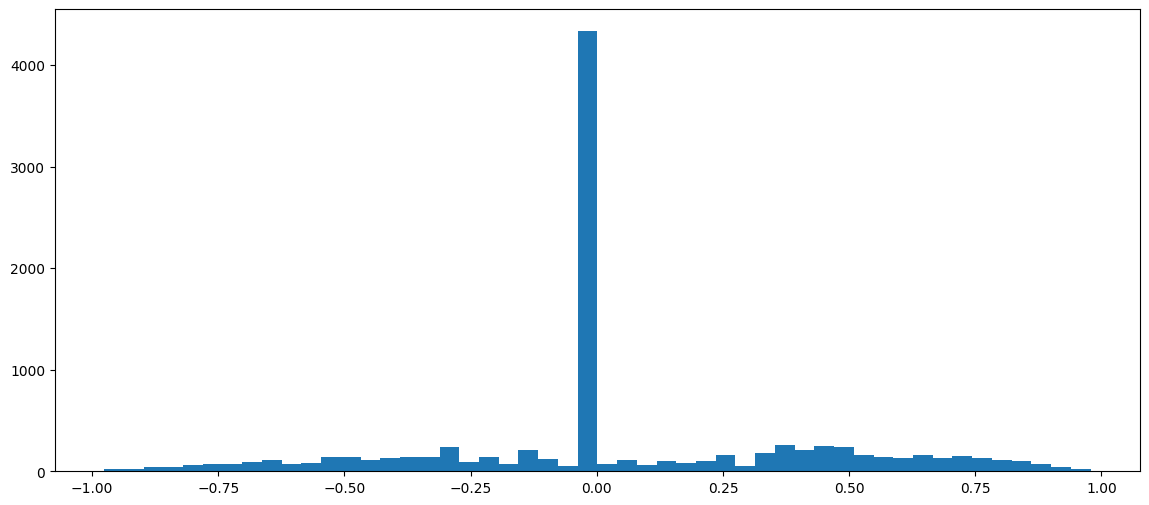

In [8]:
#Visualize Vader sentiment results
plt.figure(figsize=(14, 6))
plt.hist(sentences['compound'], bins=50);
